Array size: 100
Bubble Sort took 0.000000 seconds
Quick Sort took 0.000000 seconds
Merge Sort took 0.000000 seconds

Array size: 200
Bubble Sort took 0.000000 seconds
Quick Sort took 0.000000 seconds
Merge Sort took 0.000000 seconds

Array size: 400
Bubble Sort took 0.005705 seconds
Quick Sort took 0.000000 seconds
Merge Sort took 0.000000 seconds

Array size: 800
Bubble Sort took 0.029557 seconds
Quick Sort took 0.001549 seconds
Merge Sort took 0.002030 seconds

Array size: 1600
Bubble Sort took 0.103220 seconds
Quick Sort took 0.000000 seconds
Merge Sort took 0.000000 seconds



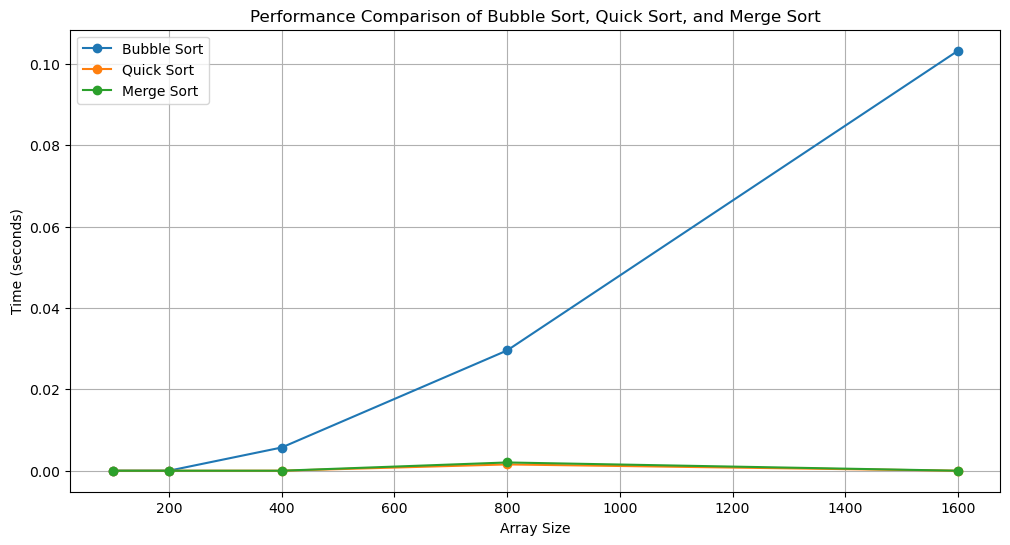

In [22]:
import time
import random
import matplotlib.pyplot as plt

# 버블 정렬 함수
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

# 퀵 정렬 함수
def quick_sort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quick_sort(left) + middle + quick_sort(right)

# 병합 정렬 함수
def merge_sort(arr):
    if len(arr) <= 1:
        return arr
    
    def merge(left, right):
        result = []
        i = j = 0
        while i < len(left) and j < len(right):
            if left[i] <= right[j]:
                result.append(left[i])
                i += 1
            else:
                result.append(right[j])
                j += 1
        result.extend(left[i:])
        result.extend(right[j:])
        return result

    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])
    return merge(left_half, right_half)

# 성능 테스트 함수
def performance_test(sort_function, arr):
    start_time = time.time()
    sorted_arr = sort_function(arr)
    end_time = time.time()
    return end_time - start_time

# 랜덤 배열 생성 및 성능 테스트
def measure_performance(array_sizes):
    bubble_times = []
    quick_times = []
    merge_times = []
    
    for size in array_sizes:
        arr = [random.randint(0, 10000) for _ in range(size)]
        
        bubble_time = performance_test(bubble_sort, arr.copy())
        quick_time = performance_test(quick_sort, arr.copy())
        merge_time = performance_test(merge_sort, arr.copy())
        
        bubble_times.append(bubble_time)
        quick_times.append(quick_time)
        merge_times.append(merge_time)
        
        print(f"Array size: {size}")
        print(f"Bubble Sort took {bubble_time:.6f} seconds")
        print(f"Quick Sort took {quick_time:.6f} seconds")
        print(f"Merge Sort took {merge_time:.6f} seconds")
        print()
    
    return bubble_times, quick_times, merge_times

# 그래픽 출력
def plot_performance(array_sizes, bubble_times, quick_times, merge_times):
    plt.figure(figsize=(12, 6))
    plt.plot(array_sizes, bubble_times, label='Bubble Sort', marker='o')
    plt.plot(array_sizes, quick_times, label='Quick Sort', marker='o')
    plt.plot(array_sizes, merge_times, label='Merge Sort', marker='o')
    plt.xlabel('Array Size')
    plt.ylabel('Time (seconds)')
    plt.title('Performance Comparison of Bubble Sort, Quick Sort, and Merge Sort')
    plt.legend()
    plt.grid(True)
    plt.show()

# 배열 크기 설정 (작은 크기부터 시작해 점진적으로 증가)
array_sizes = [100, 200, 400, 800, 1600]

# 성능 측정
bubble_times, quick_times, merge_times = measure_performance(array_sizes)

# 성능 그래프 출력
plot_performance(array_sizes, bubble_times, quick_times, merge_times)
